<a href="https://colab.research.google.com/github/Mayank01/EVA/blob/master/Assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Importing Keras library

In [0]:
# https://keras.io/
!pip install -q keras
import keras

###Importing main weapons of Keras

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

###Loading the MNIST DataSet

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

###Analysing DataSet/Visualizing

(60000, 28, 28)


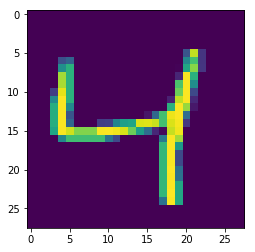

In [103]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[2])

### Re-arranging of training and test data of input image 28*28

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

###1. Normalizing the data
###2. casting of test, training data to float
###3. diving cast data to 255 bytes

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

### printing Training Data from 0-10 indexs

In [106]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

### convert 1-Dimensional class array to 10-Dimensional matrix using keras np_utils.

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

### After matrix conversion we gets below array

In [108]:
Y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [109]:
# loading packages for convolution layers
from keras.layers import Activation
from keras.layers.normalization import BatchNormalization
model = Sequential()

model.add(Convolution2D(32,3,3, activation='relu', input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(Convolution2D(32,3,3, activation='relu'))
#model.add(Convolution2D(32,3,3, activation='relu'))
         
#model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Convolution2D(10,1,1,activation='relu'))

model.add(Convolution2D(10, 3,3, activation='relu'))          
model.add(BatchNormalization())         
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Convolution2D(10,3,3,activation='relu'))
model.add(Convolution2D(10,3,3,activation='relu'))
model.add(Convolution2D(10,3,3,activation='relu'))
model.add(Convolution2D(10,3,3,activation='relu'))

model.add(Convolution2D(10,1,1, activation='relu'))          
model.add(Convolution2D(10, 3,3)) 

#model.add(MaxPooling2D(pool_size=(2,2)))
     
model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), activation="relu")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Update your `Conv2D` call to the Keras 2 API

In [110]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_170 (Conv2D)          (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_35 (Batc (None, 26, 26, 32)        128       
_________________________________________________________________
conv2d_171 (Conv2D)          (None, 24, 24, 32)        9248      
_________________________________________________________________
conv2d_172 (Conv2D)          (None, 24, 24, 10)        330       
_________________________________________________________________
conv2d_173 (Conv2D)          (None, 22, 22, 10)        910       
_________________________________________________________________
batch_normalization_36 (Batc (None, 22, 22, 10)        40        
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 11, 11, 10)        0         
__________

### Loss Function, Optimizer
>1. Loss Function to calculate deflection/Difference btw actual value and predicted value
>2. For Accurate prediction we need to minimize error which is work of backpropogation
>3. the proccess to minimize error using updating weights and bias by function called "optimizer"

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

###To fit model btw X_train and predicted y_train)

In [112]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/10
60000/60000 [==============================] - 21s 343us/step - loss: 0.2567 - acc: 0.9161
Epoch 2/10
60000/60000 [==============================] - 17s 291us/step - loss: 0.0808 - acc: 0.9759
Epoch 3/10
60000/60000 [==============================] - 17s 289us/step - loss: 0.0664 - acc: 0.9803
Epoch 4/10
60000/60000 [==============================] - 17s 290us/step - loss: 0.0581 - acc: 0.9818
Epoch 5/10
60000/60000 [==============================] - 18s 300us/step - loss: 0.0499 - acc: 0.9847
Epoch 6/10
60000/60000 [==============================] - 18s 304us/step - loss: 0.0454 - acc: 0.9859
Epoch 7/10
60000/60000 [==============================] - 19s 310us/step - loss: 0.0425 - acc: 0.9870
Epoch 8/10
60000/60000 [==============================] - 17s 291us/step - loss: 0.0409 - acc: 0.9874
Epoch 9/10
60000/60000 [==============================] - 17s 289us/step - loss: 0.0375 - acc: 0.9884
Epoch 10/10
60000/60000 [==============================] - 18s 304us/step - loss: 

### Model to evaluate the score on the basis of actual output and predicted output. 
### it will evaluate loss and Accuracy

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [114]:
print(score)

[0.06837292695915094, 0.982]


### Model predicting Y_pred from X_test data

In [0]:
y_pred = model.predict(X_test)

In [116]:
print(y_pred[:9])
print(y_test[:9])

[[1.2824080e-18 1.8373594e-08 1.0351942e-09 3.3420267e-11 2.6069375e-14
  1.4778245e-16 7.4771802e-23 1.0000000e+00 1.4995008e-15 5.8789866e-09]
 [4.1128213e-05 7.7595033e-02 9.1819835e-01 6.0082189e-06 5.9184728e-08
  7.5835311e-07 3.7059153e-03 3.1955519e-06 4.4939964e-04 1.5726670e-11]
 [2.2192213e-16 9.9999964e-01 3.4083830e-11 2.7571805e-09 1.1382550e-07
  1.3336332e-10 7.7683411e-14 2.5272470e-07 8.2922746e-10 8.7943303e-13]
 [9.9973112e-01 1.8127698e-08 2.9315988e-08 3.1519143e-08 4.5549829e-08
  5.1424431e-06 2.3539220e-04 4.5896202e-09 3.9429001e-06 2.4179928e-05]
 [4.4148682e-12 4.0686494e-08 4.0836719e-07 4.4137249e-11 9.9999869e-01
  7.4676886e-13 1.6125225e-10 2.2804835e-07 1.3172382e-09 6.0521290e-07]
 [2.4523061e-17 1.0000000e+00 1.3457236e-12 3.5034430e-11 1.1259652e-08
  5.7949019e-12 2.4809883e-15 4.9894120e-09 1.8876357e-10 1.2434133e-13]
 [1.2579914e-14 1.1069615e-03 2.0853302e-05 3.2232530e-09 9.9859029e-01
  2.9785707e-10 6.4216205e-13 2.7831068e-04 3.2832029e-06 

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

In [118]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_14'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()

KeyError: ignored